In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터 파일 불러오기
data = pd.read_csv('linear_regression_data_1.csv')

# x와 y 데이터 추출하기
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   # 마지막 컬럼을 종속변수(y)로 사용

# 다중 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)


w = model.coef_  # 가중치 배열
b = model.intercept_  # 절편

print("모델의 가중치(w):", w.round())
print("모델의 절편(b):", b.round())

모델의 가중치(w): [ 2. -7. -3.  5.  6. -9.  1.  4.]
모델의 절편(b): 4.0


# Softmax Regression

In [24]:
import numpy as np

# Softmax 함수의 출력 (예측 확률)
h = np.array([
    [0.5, 0.1, 0.4],
    [0.6, 0.1, 0.3],
    [0.8, 0.1, 0.1],
    [0.4, 0.3, 0.3],
    [0.2, 0.5, 0.3]
])

# 실제 레이블
y = np.array([0, 1, 2, 1, 1])

# Cross Entropy 손실 계산
def cross_entropy(h, y):
    # 각 샘플에 대해 실제 레이블 위치의 로그 확률 선택
    log_probs = -np.log(h[np.arange(len(h)), y])
    # 손실의 평균 계산
    return np.mean(log_probs)

# 손실 값 계산
loss = cross_entropy(h, y)
print("Cross Entropy Loss:", loss)

Cross Entropy Loss: 1.4390874702867835


# 유클리드 거리

In [9]:
import numpy as np

def euclidean_distance(point1, point2):
    # 두 벡터의 차이 계산
    diff = np.array(point1) - np.array(point2)
    # 차이값의 제곱을 더한 후 제곱근을 계산
    return np.sqrt(np.sum(diff ** 2))

# 예시 사용
point1 = [2, 3, 5, 1, 4]
point2 = [-1, 3, 9,-3, 6]

distance = euclidean_distance(point1, point2)
print(f"Euclidean Distance: {distance}")


Euclidean Distance: 6.708203932499369


# manhattan distance

In [10]:
import numpy as np

def manhattan_distance(point1, point2):
    # 두 벡터의 차이의 절댓값을 모두 더함
    return np.sum(np.abs(np.array(point1) - np.array(point2)))

# 예시 사용
point1 = [2, 3, 5, 1, 4]
point2 = [-1, 3, 9,-3, 6]

distance = manhattan_distance(point1, point2)
print(f"Manhattan Distance: {distance}")


Manhattan Distance: 13


# cosine distance

In [11]:
import numpy as np

def cosine_distance(point1, point2):
    # 두 벡터의 내적 계산
    dot_product = np.dot(point1, point2)
    # 각 벡터의 크기(노름) 계산
    norm_point1 = np.linalg.norm(point1)
    norm_point2 = np.linalg.norm(point2)
    # 코사인 유사도 계산
    cosine_similarity = dot_product / (norm_point1 * norm_point2)
    # 코사인 거리는 1 - 코사인 유사도
    return 1 - cosine_similarity

# 예시 사용
point1 = [2, 3, 5, 1, 4]
point2 = [-1, 3, 9,-3, 6]

distance = cosine_distance(point1, point2)
print(f"Cosine Distance: {distance}")


Cosine Distance: 0.1559424456352435


# KNN

In [15]:
import numpy as np

X = []
Y = []

for line in open("knn_data.csv", "r"):
    line = line.strip()
    if line[0] =="x": continue
    *x, y = line.split(",")
    x = [float(i) for i in x]

    X.append(x)
    Y.append(y)

labels = list(set(Y))
Y = [labels.index(i) for i in Y]

X = np.array(X)
Y = np.array(Y)

print(X)
print(Y)

[[ 11.69499814  -9.39309663 -15.40041252 ... -12.53419937  12.55210912
    8.85592793]
 [  2.1716169    2.59612684  -5.72080339 ...  -3.2553027   -2.97290088
   -0.58211627]
 [ 14.19955122  -9.84946415 -15.52231215 ...   2.03403525  27.84814043
  -14.29678039]
 ...
 [  5.67458438   7.66203693  -7.93141157 ... -12.2412926  -20.22399101
  -15.68143588]
 [-19.13370403  13.15984912  13.38382085 ...  -0.25272737  18.87086567
   13.73097321]
 [-14.26585762   1.4748426  -18.43293387 ...  -1.89958228  -2.73035406
  -13.57978624]]
[9 2 7 0 8 0 9 6 2 3 2 9 0 3 5 3 7 8 8 8 3 1 8 6 2 4 5 6 6 3 3 5 0 8 8 7 4
 7 1 7 7 4 0 8 1 6 4 7 3 5 4 3 4 3 2 1 0 7 6 7 8 0 7 6 3 8 5 9 4 0 2 4 3 1
 9 3 9 3 9 5 8 1 1 3 6 9 8 8 4 0 5 6 0 1 3 1 0 9 3 4 1 5 6 5 0 9 5 0 1 8 6
 5 4 6 3 4 3 8 7 5 1 4 4 2 2 1 0 6 6 3 5 9 8 7 2 0 9 1 5 4 8 8 1 6 6 4 2 8
 7 5 2 5 7 7 3 3 1 1 6 5 8 7 5 4 0 5 1 7 0 7 0 4 6 9 7 0 4 5 1 5 5 4 1 6 1
 8 6 9 5 6 8 6 1 9 5 0 2 6 2 3 2 7 7 3 9 2 9 0 3 3 0 0 1 2 4 7 0 6 6 0 1 0
 8 1 9 7 8 9 1 5 0 2 4

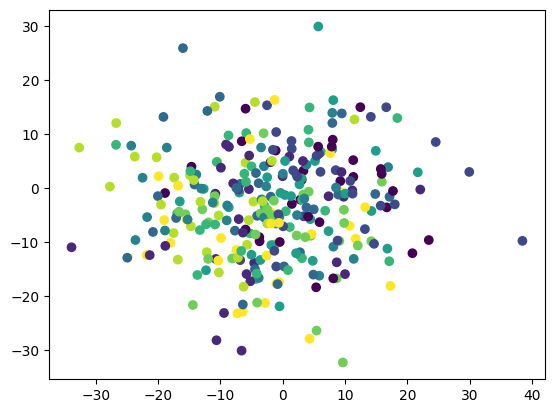

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], c=Y)

In [17]:
class KNNClassifier:
    def __init__(self, k) -> None:
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.Y = y

    def predict(self, queries):
        Y = []
        for q in queries:
            dists = np.linalg.norm(self.X - q, axis=1)
            knns = np.argsort(dists)[:self.k]
            counts = np.bincount(self.Y[knns])
            Y.append(np.argmax(counts))
        
        return np.array(Y)

In [20]:
knn = KNNClassifier(5)
knn.fit(X, Y)
q = np.array([-6, 4, 2, 1, 23, -23, 10, -21, 6, 0])
print(q)

[ -6   4   2   1  23 -23  10 -21   6   0]


In [23]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 데이터 로드
data = pd.read_csv('knn_data.csv')  # 데이터 파일 경로 확인 필요

# 데이터를 특성과 레이블로 분리
X = data[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']]
y = data['y']

# 쿼리 포인트
q = np.array([-6, 4, 2, 1, 23, -23, 10, -21, 6, 0]).reshape(1, -10)

# k 값에 따른 예측 결과 저장
results = {}

# 다양한 k 값에 대해 모델 훈련 및 예측
for k in [1, 10, 30, 100]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred_class = knn.predict(q)
    results[k] = pred_class[0]

# 결과 출력
for k, pred in results.items():
    print(f'k={k}일 때, 예측된 class: {pred}')


k=1일 때, 예측된 class: 3
k=10일 때, 예측된 class: 2
k=30일 때, 예측된 class: 2
k=100일 때, 예측된 class: 3


c:\Users\iinmv\Documents\GitHub\ML_Textbook-pytorch-\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\iinmv\Documents\GitHub\ML_Textbook-pytorch-\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\iinmv\Documents\GitHub\ML_Textbook-pytorch-\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\iinmv\Documents\GitHub\ML_Textbook-pytorch-\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [30]:
import numpy as np

def gini_impurity(y):
    """
    지니 불순도 계산 함수
    y: 클래스 레이블 리스트 (0 또는 1)
    """
    n = len(y)
    if n == 0:
        return 0  # 빈 리스트의 경우 지니 불순도 0
    p1 = np.sum(y) / n  # 클래스 1의 비율
    p0 = 1 - p1         # 클래스 0의 비율
    return 1 - p1**2 - p0**2

def find_best_threshold(X, y):
    """
    Numeric Data에서 최적의 임계값과 지니 불순도를 반환하는 함수
    X: 특성 값 리스트
    y: 클래스 레이블 리스트 (0 또는 1)
    """
    # 데이터를 X를 기준으로 정렬
    sorted_indices = np.argsort(X)
    X_sorted = np.array(X)[sorted_indices]
    y_sorted = np.array(y)[sorted_indices]
    
    best_gini = 1  # 초기값으로 최대 지니 불순도 설정
    best_threshold = None
    
    # 가능한 임계값(두 값 사이의 중간값)을 찾음
    for i in range(1, len(X_sorted)):
        threshold = (X_sorted[i-1] + X_sorted[i]) / 2
        
        # 해당 임계값을 기준으로 데이터를 좌/우로 분할
        left_labels = y_sorted[:i]
        right_labels = y_sorted[i:]
        
        # 좌/우 그룹의 지니 불순도 계산
        left_gini = gini_impurity(left_labels)
        right_gini = gini_impurity(right_labels)
        
        # 가중 평균 지니 불순도 계산
        total_samples = len(y_sorted)
        weighted_gini = (len(left_labels) / total_samples) * left_gini + (len(right_labels) / total_samples) * right_gini
        
        # 더 낮은 지니 불순도를 찾으면 갱신
        if weighted_gini < best_gini:
            best_gini = weighted_gini
            best_threshold = threshold
    
    return best_threshold, best_gini


# 예시 데이터
X = [6.3, 5.3, 7.2, 6.3, 9.8, 7.2, 6.3, 5.7, 8.0, 6.2] # 특성 값 (수면 시간)
y = [0, 1, 0, 1, 1, 0, 1, 1, 0, 0]  # 클래스 레이블 (커피 마신 여부)

threshold, gini = find_best_threshold(X, y)
print(f"Best Threshold: {threshold}, Gini Impurity: {gini}")

Best Threshold: 6.3, Gini Impurity: 0.31999999999999984


In [31]:
import numpy as np

# 예시 데이터 (2차원 데이터)
data = np.array([
    (1, 1),
    (1, 2),
    (1, 4),
    (1, 5),
    (2, 1),
    (4, 4),
])

# 초기 중심점 설정 (2개의 중심점)
centroids = np.array([
    (2, 3),
    (3, 3)  
])

# 유클리드 거리 계산 함수
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# 각 데이터 포인트에 가장 가까운 중심점을 할당
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)  # 가장 가까운 중심점의 인덱스
        clusters.append(cluster)
    return np.array(clusters)

# 새로운 중심점 계산
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]  # i번 군집에 속하는 데이터들
        new_centroid = cluster_points.mean(axis=0)  # 평균 좌표 계산
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

# 클러스터 할당
clusters = assign_clusters(data, centroids)

# 새로운 중심점 계산
new_centroids = update_centroids(data, clusters, k=2)

print("초기 중심점:")
print(centroids)
print("\n새로운 중심점:")
print(new_centroids)

초기 중심점:
[[2 3]
 [3 3]]

새로운 중심점:
[[1.2 2.6]
 [4.  4. ]]


In [29]:
import numpy as np

# 클러스터별 데이터 포인트


cluster1 = np.array([(1, 3), (2, 2), (2, 4), (3, 3)])
cluster2 = np.array([(5, 2), (6, 2), (7, 2)])

# 새로운 센트로이드 계산
centroid1 = np.mean(cluster1, axis=0)
centroid2 = np.mean(cluster2, axis=0)

# Inertia 계산 함수
def calculate_inertia(cluster, centroid):
    return np.sum((cluster - centroid) ** 2)

# 각 클러스터의 Inertia 계산
inertia1 = calculate_inertia(cluster1, centroid1)
inertia2 = calculate_inertia(cluster2, centroid2)

# 결과 출력
print("Cluster 1의 새로운 센트로이드:", centroid1)
print("Cluster 2의 새로운 센트로이드:", centroid2)
print("Cluster 1의 Inertia:", inertia1)
print("Cluster 2의 Inertia:", inertia2)
print("총 Inertia:", inertia1 + inertia2)

Cluster 1의 새로운 센트로이드: [2. 3.]
Cluster 2의 새로운 센트로이드: [6. 2.]
Cluster 1의 Inertia: 4.0
Cluster 2의 Inertia: 2.0
총 Inertia: 6.0


In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("hospital_patient_records.csv")
print(data)

    성별  나이    체중   병명         진단일  치료여부
0   남성  80  85.0  고혈압  2022-01-02     0
1   여성  69  72.3   폐렴  2022-01-09     1
2   남성  21  61.0   폐렴  2022-01-16     1
3   남성  40  57.3  당뇨병  2022-01-23     0
4   남성  32  82.2   폐렴  2022-01-30     1
..  ..  ..   ...  ...         ...   ...
95  여성  77  58.1   폐렴  2023-10-29     1
96  여성  19  64.5   폐렴  2023-11-05     0
97  여성  18  72.4  당뇨병  2023-11-12     1
98  여성  65  68.3   감기  2023-11-19     1
99  남성  29  82.5  고혈압  2023-11-26     0

[100 rows x 6 columns]


In [36]:
features = ['성별', '나이', '체중', '병명',]
X = pd.get_dummies(data[features], drop_first=True)

n_features = ['성별_여성',  '병명_고혈압',  '병명_당뇨병',  '병명_폐렴']
X[n_features] = X[n_features].astype(int)
y = data['치료여부']

print(X)

# missing_value = data.isnull()
# # 수치형 컬럼의 결측값을 평균으로 채우기
# for column in data.columns:
#     if data[column].dtype != 'object':  # 데이터 타입이 수치형인 경우
#         data[column] = data[column].fillna(data[column].mean())
# # 범주형 데이터를 one-hot 인코딩으로 변환
# X_encoded = pd.get_dummies(X)

    나이    체중  성별_여성  병명_고혈압  병명_당뇨병  병명_폐렴
0   80  85.0      0       1       0      0
1   69  72.3      1       0       0      1
2   21  61.0      0       0       0      1
3   40  57.3      0       0       1      0
4   32  82.2      0       0       0      1
..  ..   ...    ...     ...     ...    ...
95  77  58.1      1       0       0      1
96  19  64.5      1       0       0      1
97  18  72.4      1       0       1      0
98  65  68.3      1       0       0      0
99  29  82.5      0       1       0      0

[100 rows x 6 columns]


In [37]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()